In [2]:
import pandas as pd
from math import log
import numpy as np
import matplotlib.pyplot as plt

In [37]:
url = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv'
covidCasesRaw = pd.read_csv(url)
covidCasesRaw = covidCasesRaw.drop(columns=['fips'])
covidCasesRaw['country'] = 'USA'
covidCasesRaw = covidCasesRaw.set_index(['country','state','county','date']).sort_index()
covidCasesByCounty = covidCasesRaw.copy()
covidCasesByCounty.index = covidCasesByCounty.index.map(lambda index: (index[0],index[1],index[2]+", " + index[1],index[3])).droplevel(['country','state'])
covidCasesByState = covidCasesRaw.groupby(['state','date']).sum()
covidCasesWholeCountry = covidCasesRaw.groupby(['country','date']).sum()
covidCases = covidCasesWholeCountry.append(covidCasesByState).append(covidCasesByCounty)
covidCases.head

<bound method NDFrame.head of                               cases  deaths
country           date                     
USA               2020-01-21      1       0
                  2020-01-22      1       0
                  2020-01-23      1       0
                  2020-01-24      2       0
                  2020-01-25      3       0
...                             ...     ...
Washakie, Wyoming 2020-04-02      2       0
                  2020-04-03      2       0
                  2020-04-04      2       0
                  2020-04-05      4       0
                  2020-04-06      4       0

[40213 rows x 2 columns]>

In [39]:
def getDeathRate(deaths, cases): 
    if cases <= 0: return np.NaN 
    else: return deaths / cases

crudeDeathRate = covidCases.apply(lambda row: getDeathRate(row.deaths,row.cases), axis = 1)

changes = covidCases.diff(1)

pctChanges = covidCases.pct_change(1)

def getDoublingTimeFromPctChange(pctChange): 
    if pctChange <= 0: return np.NaN
    if pctChange == np.Inf: return np.NaN
    else:  return log(2) / log(1+pctChange)

doublingTimes = pctChanges.applymap(getDoublingTimeFromPctChange)

Text(0, 0.5, 'Doubling Time (Days)')

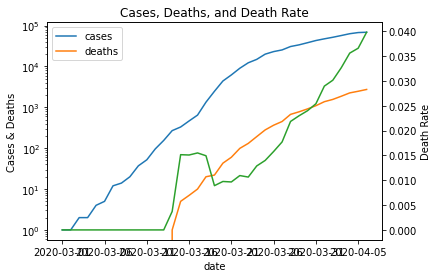

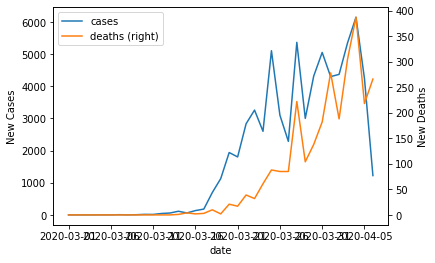

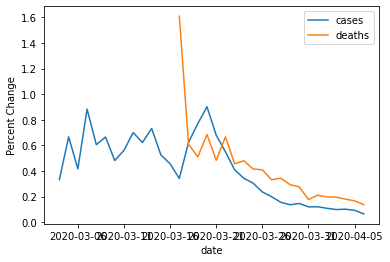

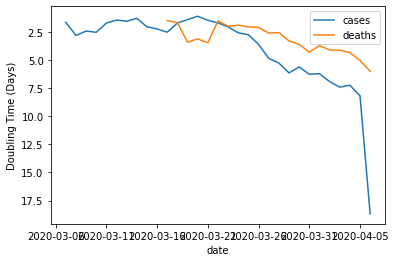

In [65]:
location = 'New York City, New York'
casePlot = covidCases.loc[location].plot(logy=True)
casePlot.set_title('Cases, Deaths, and Death Rate')
casePlot.set_ylabel('Cases & Deaths')
crudeDeathRate.loc[location].plot(secondary_y=True, label = 'death rate')
casePlot.right_ax.set_ylabel('Death Rate')
changePlot = changes.loc[location].plot(secondary_y=['deaths'])
changePlot.set_ylabel('New Cases')
changePlot.right_ax.set_ylabel('New Deaths')
pctChangePlot = pctChanges.loc[location].rolling(3).mean().plot()
pctChangePlot.set_ylabel('Percent Change')
doublingTimePlot = doublingTimes.loc[location].rolling(3).mean().plot()
doublingTimePlot.invert_yaxis()
doublingTimePlot.set_ylabel('Doubling Time (Days)')